In [1]:
!pip install pmdarima
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.6 MB/s eta 0:00:00


In [2]:
!pip install prophet
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 841.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bbe2b95309b62e33d01acabac18e34af904e7b410d5d8d92f52f67626c5d4c38
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
from google.colab import files
uploaded = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv


In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('NSE-TATAGLOBAL.csv')

# Display the first few rows of the DataFrame
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')

In [7]:
data = data.iloc[::-1]

In [8]:
data.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2029,2010-07-28,118.00,120.50,117.20,118.15,118.25,835593,994.01
2028,2010-07-29,112.50,121.70,112.50,117.50,116.60,2359134,2791.03
2027,2010-07-30,116.50,118.00,114.60,115.85,116.05,2656191,3112.68
2026,2010-08-02,117.30,118.50,116.60,118.10,117.30,663593,779.85
2025,2010-08-03,118.30,119.95,117.90,118.65,118.30,611234,726.78


In [9]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [10]:
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
Total Trade Quantity,int64
Turnover (Lacs),float64


In [11]:
data.duplicated().sum()

0

From above callings, we can come to knaow that there is no missing values and duplicated value in the data file. SO let move forward for other calculation !

In [12]:
data.reset_index(inplace=True)

In [13]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


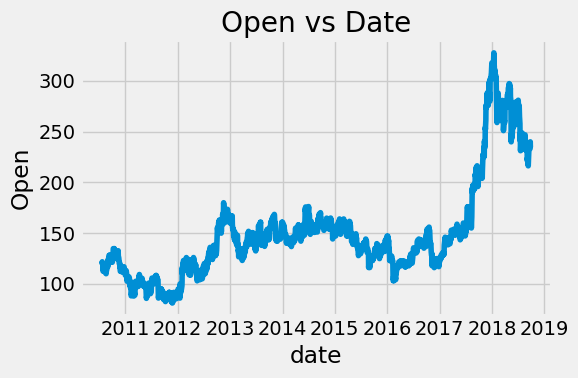

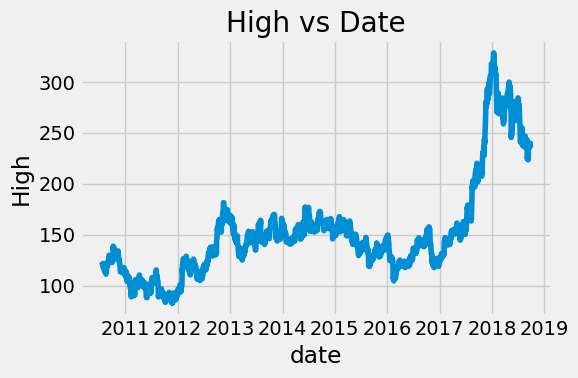

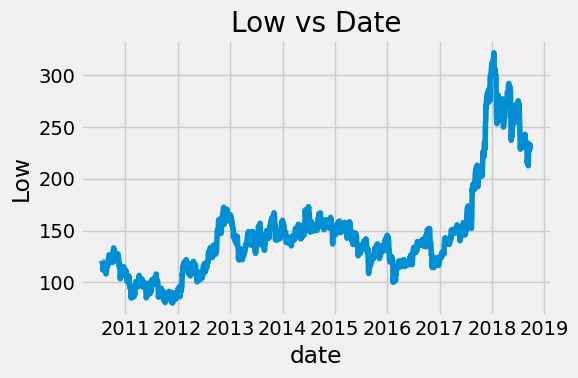

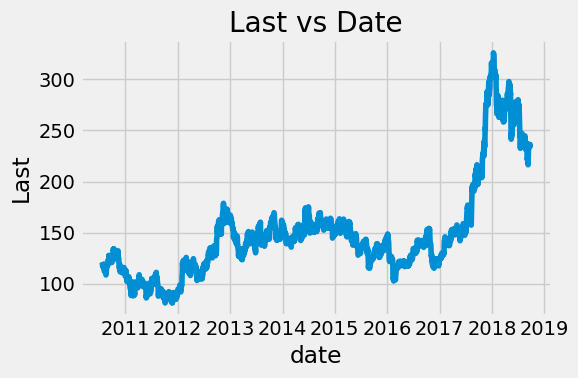

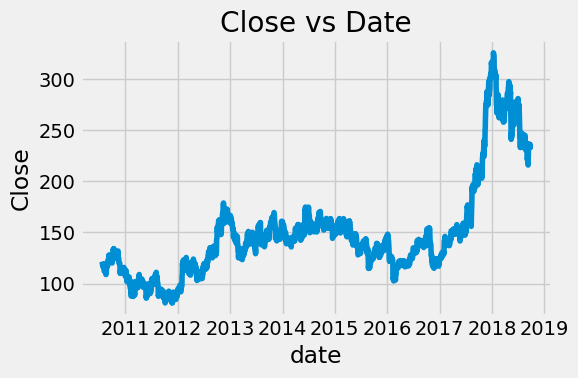

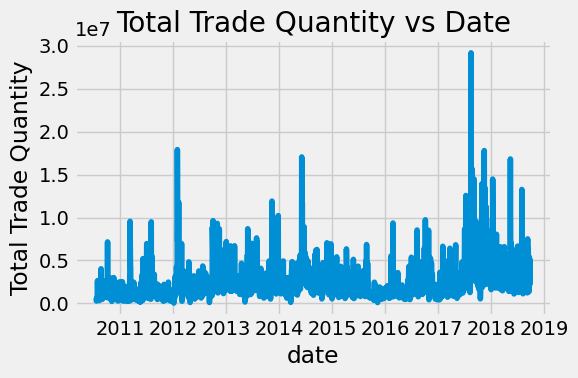

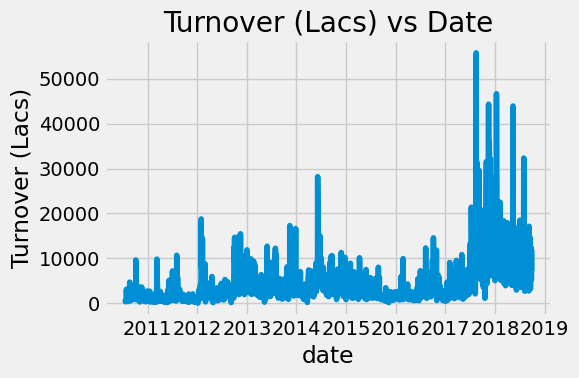

In [14]:
# Now we have to check the relationship pattern and trend's.
for column in data.columns[2:]:
  plt.figure(figsize=(6,4))
  plt.plot(data['Date'], data[column])
  plt.xlabel('date')
  plt.ylabel(column)
  plt.title(f'{column} vs Date')
  plt.tight_layout()
  plt.show()

From the above graph we can see that prices, turnover and total trade quantity is increasing from 2017.

Checking Stationarity

In [15]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()
  plt.plot(timeseries, color = 'blue', label = 'original')
  plt.plot(rolmean, color = 'red', label = 'rolling mean')
  plt.plot(rolstd, color = 'black', label = 'rolling std')
  plt.legend(loc = 'best')
  plt.title('Rolling mean and Standard deviation')
  plt.show(block = False)
  print('Result of dickey fuller test')
  adft = adfuller(timeseries, autolag = 'AIC')
  output = pd.Series(adft[0:4], index = ['test statistic', 'p-value', '#lags used', 'number of observations used'])
  for key, value in adft[4].items():
    output['critical value(%s)' %key] = value
    print(output)

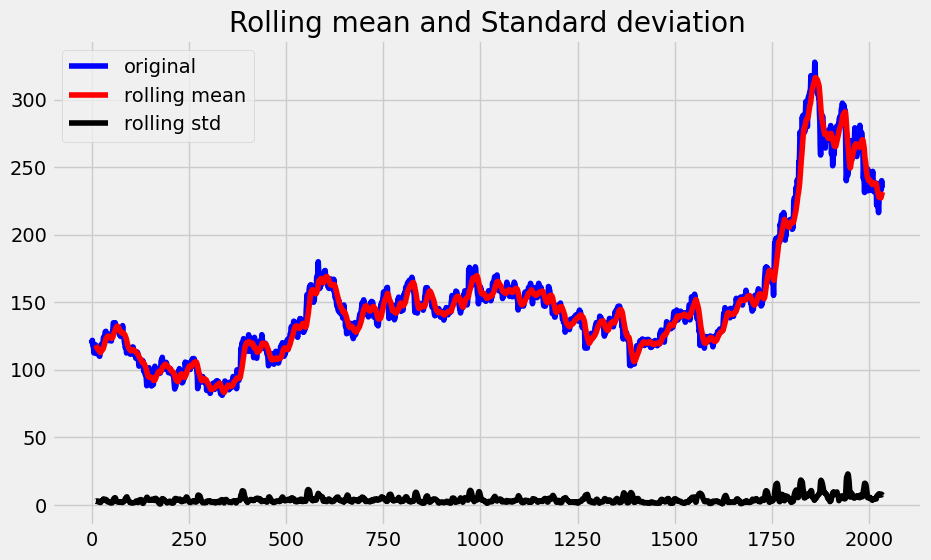

Result of dickey fuller test
test statistic                   -0.951734
p-value                           0.770459
#lags used                        8.000000
number of observations used    2026.000000
critical value(1%)               -3.433582
dtype: float64
test statistic                   -0.951734
p-value                           0.770459
#lags used                        8.000000
number of observations used    2026.000000
critical value(1%)               -3.433582
critical value(5%)               -2.862968
dtype: float64
test statistic                   -0.951734
p-value                           0.770459
#lags used                        8.000000
number of observations used    2026.000000
critical value(1%)               -3.433582
critical value(5%)               -2.862968
critical value(10%)              -2.567530
dtype: float64


In [16]:
test_stationarity(data['Open'])

From the above graph we can see that mean and standard deviation are consisting increasing nut not stationary.

And also we can see that p- value is greather than 0.05 so we cannot apply the Null hypothesis. And test statistics is greater than critical values. So, test is not stationary.

In order to perform a time series, we need to separate seasonality and trend from our series. The resultant series will become stationary thrugh this process.

So, let us separate seasonality and trend from the time series.

<Figure size 1000x600 with 0 Axes>

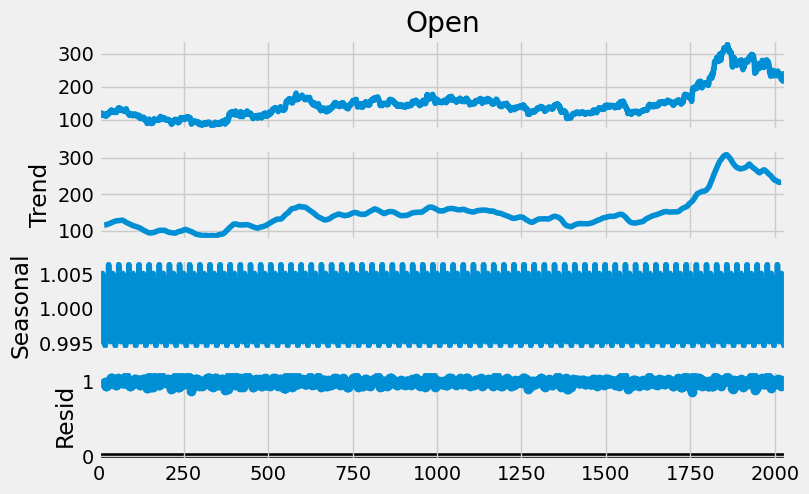

In [17]:
result = seasonal_decompose(data['Open'], model = 'multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 5)

In [18]:
def test_stationarity(timeseries):
  timeseries_log = np.log(timeseries)
  timeseries_log_diff = timeseries_log.diff().dropna()
  rolmean = timeseries_log_diff.rolling(window=12).mean()
  rolstd = timeseries_log_diff.rolling(window=12).std()
  plt.figure(figsize=(6, 4))
  plt.plot(timeseries_log_diff, color = 'blue', label = 'original')
  plt.plot(rolmean, color = 'red', label = 'rolling mean')
  plt.plot(rolstd, color = 'black', label = 'rolling std')
  plt.legend(loc = 'best')
  plt.title('Rolling mean and standard deviation')
  plt.xlabel('Date')
  plt.ylabel('Log-differnece')
  plt.show()
  adft= adfuller(timeseries_log_diff, autolag = 'AIC')
  output = pd.Series(adft[0:4], index = ['test_statistics', 'p-value', 'Number of lag used', 'Number of observation used'])
  for key, value in adft[4].items():
    output[f'Critical value ({key})'] = value
    print(output)

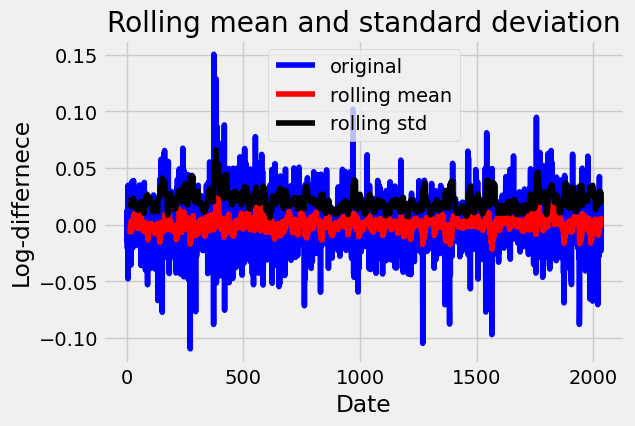

test_statistics                -49.577189
p-value                          0.000000
Number of lag used               0.000000
Number of observation used    2033.000000
Critical value (1%)             -3.433571
dtype: float64
test_statistics                -49.577189
p-value                          0.000000
Number of lag used               0.000000
Number of observation used    2033.000000
Critical value (1%)             -3.433571
Critical value (5%)             -2.862963
dtype: float64
test_statistics                -49.577189
p-value                          0.000000
Number of lag used               0.000000
Number of observation used    2033.000000
Critical value (1%)             -3.433571
Critical value (5%)             -2.862963
Critical value (10%)            -2.567527
dtype: float64


In [19]:
test_stationarity(data['Open'])

**Model Fitting**

Moving Average

In [28]:
import numpy as np
def moving_avg_prediction(data):
  shape = data.shape[0]
  df_new = data[['Open']]
  df_new['Open'] = np.log(df_new['Open'])
  train_set = df_new.iloc[:ceil (shape * 0.09)]
  valid_set = df_new.iloc[ceil(shape * 0.09):]
  print('--------------------------------------------------------------------------')
  print('--------------Stock Price Prediction by Moving Average--------------------')
  print('--------------------------------------------------------------------------')
  print('Shape of training set:', train_set.shape)
  print('Valid of Validation set:', valid_set.shape)
  preds = []
  for i in range(0, valid_set.shape[0]):
    a = train_set['Open'][len(train_set) - valid_set.shape[0] + i:].sum() + sum(preds)
    b = a / valid_set.shape[0]
    preds.append(b)
  rms = np.sqrt(np.mean(np.power((np.array(valid_set['Open']) - preds), 2)))
  print('RMSE of Validation set:', rms)
  print('------------------------------------------------------------------------')
  valid_set['Predictions'] = preds
  plt.figure(figsize=(6, 4))
  plt.plot(train_set['Open'])
  plt.plot(valid_set[['Open', 'Predictions']])
  plt.xlabel('Date', size=20)
  plt.ylabel('Log-transformed Open Price', size=20)
  plt.title('Log-transformed Open Price Prediction by Moving Averages', size=20)
  plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

--------------------------------------------------------------------------
--------------Stock Price Prediction by Moving Average--------------------
--------------------------------------------------------------------------
Shape of training set: (184, 1)
Valid of Validation set: (1851, 1)
RMSE of Validation set: 4.241616269959699
------------------------------------------------------------------------


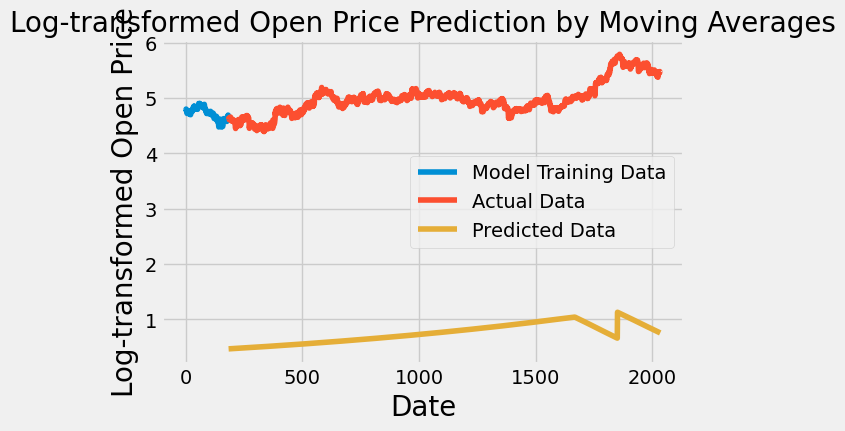

In [29]:
from math import ceil, floor
moving_avg_prediction(data)

ARIMA

In [30]:
def moving_avg_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])
    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    training = train_set['Open']
    validation = valid_set['Open']
    model = auto_arima(training, start_p=0, start_q=0, max_p=3, max_q=3, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=len(validation))
    forecast.index = validation.index
    forecast = pd.DataFrame(forecast,columns =['Prediction'])
    rms = np.sqrt(np.mean(np.power((np.array(validation) - np.array(forecast['Prediction'])), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    plt.figure(figsize=(8, 4))
    plt.plot(train_set['Open'])
    plt.plot(valid_set['Open'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Auto ARIMA', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

In [32]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [33]:
data.set_index('Date', inplace = True)

In [34]:
data.head()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2034,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2033,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2032,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2031,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2030,117.6,119.50,112.00,118.80,118.65,586100,694.98


----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set: (1832, 1)
Shape of Validation Set: (203, 1)
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8692.066, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8710.004, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8710.096, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8693.292, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8708.142, Time=1.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8708.178, Time=2.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8706.122, Time=2.99 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8711.116, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8709.171, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-8709.170, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE value on validation set: 0.1138552459146161
-----------------------------------------------------------


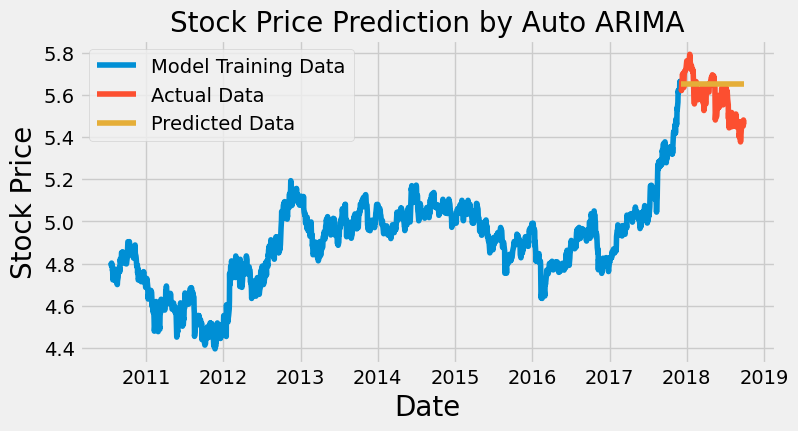

In [35]:
moving_avg_prediction(data)

**SARIMA**

In [36]:
data.head()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2034,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2033,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2032,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2031,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2030,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [48]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')
print(data.head())  # Check if 'Open' column exists

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


In [49]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from statsmodels.tsa.statespace.sarimax import SARIMAX
def sarima_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])
    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY SARIMA--------------')
    print('----------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    training = train_set['Open']
    validation = valid_set['Open']
    model = SARIMAX(training,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit()
    forecast = results.get_forecast(steps=len(validation))
    forecast_index = valid_set.index
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    forecast_df = pd.DataFrame(forecast_mean, index=forecast_index, columns=['Prediction'])
    rms = np.sqrt(np.mean(np.power(validation - forecast_df['Prediction'], 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(train_set['Open'], label='Model Training Data')
    plt.plot(valid_set['Open'], label='Actual Data')
    plt.plot(forecast_df['Prediction'], label='Predicted Data', color='red')
    plt.fill_between(forecast_index,
                     forecast_conf_int.iloc[:, 0],
                     forecast_conf_int.iloc[:, 1],
                     color='pink', alpha=0.3)
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by SARIMA', size=20)
    plt.legend()
    plt.show()

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY SARIMA--------------
----------------------------------------------------------
Shape of Training Set: (1832, 1)
Shape of Validation Set: (203, 1)
RMSE value on validation set: nan
-----------------------------------------------------------


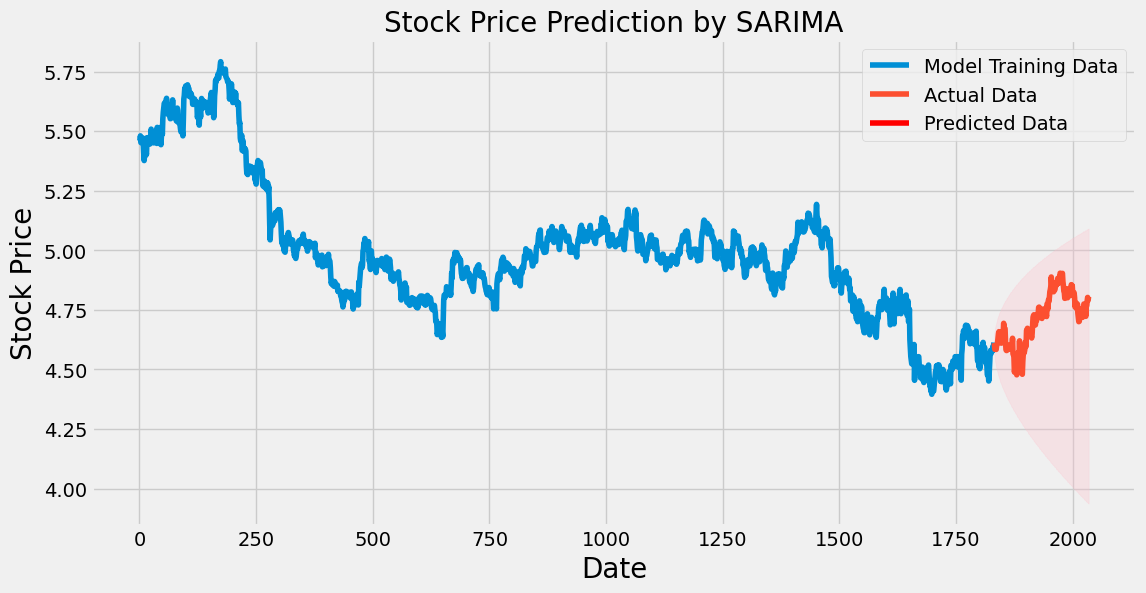

In [53]:
sarima_prediction(data)

In [54]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
